# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units=metric"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        print(city_weather)
            
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    
        # Append the City information into city_data list
        city_data.append({"City": city, 
                      "Lat": city_lat, 
                      "Lng": city_lng, 
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass



# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stanley
{'coord': {'lon': -1.6985, 'lat': 54.868}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 17.29, 'feels_like': 16.93, 'temp_min': 15.41, 'temp_max': 18.27, 'pressure': 989, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 210}, 'rain': {'1h': 6.48}, 'clouds': {'all': 40}, 'dt': 1689433814, 'sys': {'type': 2, 'id': 2002060, 'country': 'GB', 'sunrise': 1689392890, 'sunset': 1689453410}, 'timezone': 3600, 'id': 8224783, 'name': 'Stanley', 'cod': 200}
Processing Record 2 of Set 1 | waitangi
{'coord': {'lon': -176.5597, 'lat': -43.9535}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 8.23, 'feels_like': 7.82, 'temp_min': 8.23, 'temp_max': 8.23, 'pressure': 1008, 'humidity': 91}, 'visibility': 10000, 'wind': 

{'coord': {'lon': -72.4875, 'lat': -51.7236}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 1.25, 'feels_like': -1.07, 'temp_min': 1.25, 'temp_max': 1.25, 'pressure': 1016, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 330}, 'clouds': {'all': 20}, 'dt': 1689433816, 'sys': {'type': 1, 'id': 8495, 'country': 'CL', 'sunrise': 1689425349, 'sunset': 1689454933}, 'timezone': -10800, 'id': 3874958, 'name': 'Puerto Natales', 'cod': 200}
Processing Record 16 of Set 1 | la passe
{'coord': {'lon': -0.8967, 'lat': 45.5549}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21.48, 'feels_like': 21.25, 'temp_min': 21.1, 'temp_max': 21.68, 'pressure': 1015, 'humidity': 60, 'sea_level': 1015, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 7.29, 'deg': 262, 'gust': 9.01}, 'clouds': {'all': 93}, 'dt': 1689433816

{'coord': {'lon': 145.575, 'lat': 43.3236}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 14.14, 'feels_like': 14.17, 'temp_min': 14.14, 'temp_max': 14.14, 'pressure': 1006, 'humidity': 98, 'sea_level': 1006, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 4.99, 'deg': 65, 'gust': 7.4}, 'rain': {'1h': 0.24}, 'clouds': {'all': 100}, 'dt': 1689433818, 'sys': {'country': 'JP', 'sunrise': 1689447062, 'sunset': 1689501355}, 'timezone': 32400, 'id': 2128975, 'name': 'Nemuro', 'cod': 200}
Processing Record 31 of Set 1 | cabo san lucas
{'coord': {'lon': -109.9124, 'lat': 22.8909}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 31.58, 'feels_like': 38.53, 'temp_min': 30.1, 'temp_max': 32.01, 'pressure': 1007, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 260}, 'clouds': {'all': 75}, 'dt': 1689433555, 'sys

{'coord': {'lon': 20.0403, 'lat': -34.5322}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 15.81, 'feels_like': 14.86, 'temp_min': 15.81, 'temp_max': 15.81, 'pressure': 1017, 'humidity': 54, 'sea_level': 1017, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 4.96, 'deg': 286, 'gust': 10.47}, 'clouds': {'all': 100}, 'dt': 1689433820, 'sys': {'country': 'ZA', 'sunrise': 1689399854, 'sunset': 1689436012}, 'timezone': 7200, 'id': 1015776, 'name': 'Bredasdorp', 'cod': 200}
Processing Record 47 of Set 1 | vilyuchinsk
{'coord': {'lon': 158.4028, 'lat': 52.9306}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 10.55, 'feels_like': 10.12, 'temp_min': 10.55, 'temp_max': 10.55, 'pressure': 1013, 'humidity': 94, 'sea_level': 1013, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 1.28, 'deg': 155, 'gust': 1.36}, 

{'coord': {'lon': -49.1247, 'lat': -12.48}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 35.96, 'feels_like': 34.14, 'temp_min': 35.96, 'temp_max': 35.96, 'pressure': 1012, 'humidity': 20, 'sea_level': 1012, 'grnd_level': 979}, 'visibility': 10000, 'wind': {'speed': 1.9, 'deg': 94, 'gust': 4.89}, 'clouds': {'all': 2}, 'dt': 1689433827, 'sys': {'country': 'BR', 'sunrise': 1689413917, 'sunset': 1689455150}, 'timezone': -10800, 'id': 3472404, 'name': 'Alvorada', 'cod': 200}
Processing Record 10 of Set 2 | college
{'coord': {'lon': -147.8028, 'lat': 64.8569}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 12.35, 'feels_like': 12.02, 'temp_min': 11.37, 'temp_max': 13.66, 'pressure': 1014, 'humidity': 91}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 200}, 'rain': {'1h': 0.11}, 'clouds': {'all': 100}, 'dt': 1689433793, 'sys': {'type'

{'coord': {'lon': 6.4419, 'lat': 49.6747}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 20.86, 'feels_like': 21.14, 'temp_min': 19.65, 'temp_max': 23.68, 'pressure': 1011, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 230}, 'rain': {'1h': 0.42}, 'clouds': {'all': 40}, 'dt': 1689433829, 'sys': {'type': 1, 'id': 1601, 'country': 'LU', 'sunrise': 1689392556, 'sunset': 1689449837}, 'timezone': 7200, 'id': 2960515, 'name': 'Grevenmacher', 'cod': 200}
Processing Record 25 of Set 2 | cargados carajos
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 26 of Set 2 | invercargill
{'coord': {'lon': 168.35, 'lat': -46.4}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 9.91, 'feels_like': 7, 'temp_min': 9.91, 'temp_max': 9.91, 'pressure': 999, 'humidity': 67, 'sea_level': 999, 'grnd_

{'coord': {'lon': -120.4579, 'lat': 34.6391}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 11.4, 'feels_like': 11.21, 'temp_min': 11.4, 'temp_max': 12.23, 'pressure': 1013, 'humidity': 100}, 'visibility': 6437, 'wind': {'speed': 1.54, 'deg': 230}, 'clouds': {'all': 100}, 'dt': 1689433733, 'sys': {'type': 1, 'id': 6155, 'country': 'US', 'sunrise': 1689425989, 'sunset': 1689477320}, 'timezone': -25200, 'id': 5367788, 'name': 'Lompoc', 'cod': 200}
Processing Record 43 of Set 2 | uturoa
{'coord': {'lon': -151.4333, 'lat': -16.7333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 26.01, 'feels_like': 26.01, 'temp_min': 26.01, 'temp_max': 26.01, 'pressure': 1012, 'humidity': 68, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 6.39, 'deg': 72, 'gust': 6.49}, 'clouds': {'all': 6}, 'dt': 1689433831, 'sys': {'country': 

{'coord': {'lon': -28.7, 'lat': 38.5167}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 22.22, 'feels_like': 22.4, 'temp_min': 20.99, 'temp_max': 22.22, 'pressure': 1028, 'humidity': 73}, 'visibility': 9000, 'wind': {'speed': 2.06, 'deg': 120}, 'rain': {'1h': 0.25}, 'clouds': {'all': 75}, 'dt': 1689433832, 'sys': {'type': 1, 'id': 6883, 'country': 'PT', 'sunrise': 1689403342, 'sunset': 1689455920}, 'timezone': 0, 'id': 3372707, 'name': 'Ribeira Grande', 'cod': 200}
Processing Record 7 of Set 3 | ibi
{'coord': {'lon': -0.5723, 'lat': 38.6253}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 27.57, 'feels_like': 27.19, 'temp_min': 24.01, 'temp_max': 35.75, 'pressure': 1011, 'humidity': 38, 'sea_level': 1011, 'grnd_level': 930}, 'visibility': 10000, 'wind': {'speed': 4.02, 'deg': 180, 'gust': 4.83}, 'clouds': {'all': 0}, '

{'coord': {'lon': 14.9667, 'lat': -20.3667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 25.7, 'feels_like': 24.53, 'temp_min': 25.7, 'temp_max': 25.7, 'pressure': 1014, 'humidity': 8, 'sea_level': 1014, 'grnd_level': 909}, 'visibility': 10000, 'wind': {'speed': 0.92, 'deg': 323, 'gust': 2.78}, 'clouds': {'all': 0}, 'dt': 1689433834, 'sys': {'country': 'NA', 'sunrise': 1689399346, 'sunset': 1689438955}, 'timezone': 7200, 'id': 3356213, 'name': 'Khorixas', 'cod': 200}
Processing Record 21 of Set 3 | dudinka
{'coord': {'lon': 86.1778, 'lat': 69.4058}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 10.9, 'feels_like': 9.9, 'temp_min': 10.9, 'temp_max': 10.9, 'pressure': 1000, 'humidity': 71, 'sea_level': 1000, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 5.83, 'deg': 191, 'gust': 9.96}, 'rain': {'1h': 0.1}, 'clouds': {'all

{'coord': {'lon': 75.4742, 'lat': 49.4058}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 21.34, 'feels_like': 20.23, 'temp_min': 21.34, 'temp_max': 21.34, 'pressure': 1005, 'humidity': 27, 'sea_level': 1005, 'grnd_level': 913}, 'visibility': 10000, 'wind': {'speed': 7.56, 'deg': 257, 'gust': 11.73}, 'clouds': {'all': 42}, 'dt': 1689433836, 'sys': {'country': 'KZ', 'sunrise': 1689376047, 'sunset': 1689433208}, 'timezone': 21600, 'id': 1519934, 'name': 'Qarqaraly', 'cod': 200}
Processing Record 36 of Set 3 | juneau
{'coord': {'lon': -134.4197, 'lat': 58.3019}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 16.71, 'feels_like': 16.73, 'temp_min': 15.23, 'temp_max': 17.28, 'pressure': 1019, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 60}, 'clouds': {'all': 100}, 'dt': 1689433722, 'sys': {'type': 2, 

{'coord': {'lon': -49.35, 'lat': -28.6167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 19.62, 'feels_like': 19.05, 'temp_min': 19.62, 'temp_max': 19.62, 'pressure': 1021, 'humidity': 54, 'sea_level': 1021, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 1.51, 'deg': 81, 'gust': 2.23}, 'clouds': {'all': 57}, 'dt': 1689433837, 'sys': {'type': 2, 'id': 2038862, 'country': 'BR', 'sunrise': 1689415724, 'sunset': 1689453450}, 'timezone': -10800, 'id': 3466005, 'name': 'Cocal', 'cod': 200}
Processing Record 1 of Set 4 | mandan
{'coord': {'lon': -100.8896, 'lat': 46.8267}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 17.18, 'feels_like': 16.86, 'temp_min': 16.64, 'temp_max': 17.54, 'pressure': 1013, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 1.79, 'deg': 289, 'gust': 3.58}, 'clouds': {'all': 21}, 'dt': 1689

{'coord': {'lon': 93.1461, 'lat': 55.9519}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 20.41, 'feels_like': 20.62, 'temp_min': 20.41, 'temp_max': 20.55, 'pressure': 998, 'humidity': 81, 'sea_level': 998, 'grnd_level': 974}, 'visibility': 10000, 'wind': {'speed': 2.65, 'deg': 150, 'gust': 5.45}, 'clouds': {'all': 74}, 'dt': 1689433839, 'sys': {'type': 1, 'id': 8957, 'country': 'RU', 'sunrise': 1689369692, 'sunset': 1689431079}, 'timezone': 25200, 'id': 1484923, 'name': 'Zykovo', 'cod': 200}
Processing Record 16 of Set 4 | vorgashor
{'coord': {'lon': 63.95, 'lat': 67.5833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17.03, 'feels_like': 16.2, 'temp_min': 17.03, 'temp_max': 17.03, 'pressure': 1010, 'humidity': 54, 'sea_level': 1010, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 4.26, 'deg': 332, 'gust': 6.95}

{'coord': {'lon': -71.3167, 'lat': -42.9}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 1.54, 'feels_like': -1.2, 'temp_min': 1.54, 'temp_max': 1.54, 'pressure': 1022, 'humidity': 93, 'sea_level': 1022, 'grnd_level': 949}, 'visibility': 10000, 'wind': {'speed': 2.5, 'deg': 284, 'gust': 3.05}, 'clouds': {'all': 76}, 'dt': 1689433840, 'sys': {'country': 'AR', 'sunrise': 1689423112, 'sunset': 1689456608}, 'timezone': -10800, 'id': 3855974, 'name': 'Esquel', 'cod': 200}
Processing Record 32 of Set 4 | ta`u
{'coord': {'lon': -169.5144, 'lat': -14.2336}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 26.92, 'feels_like': 29.39, 'temp_min': 26.92, 'temp_max': 26.92, 'pressure': 1009, 'humidity': 78, 'sea_level': 1009, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 8.04, 'deg': 108, 'gust': 8.31}, 'clouds': {'all': 15}, 'd

{'coord': {'lon': 40.1081, 'lat': 50.4578}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 18.92, 'feels_like': 19.01, 'temp_min': 18.92, 'temp_max': 18.92, 'pressure': 1011, 'humidity': 82, 'sea_level': 1011, 'grnd_level': 1002}, 'visibility': 8903, 'wind': {'speed': 5.75, 'deg': 332, 'gust': 9.66}, 'clouds': {'all': 60}, 'dt': 1689433842, 'sys': {'country': 'RU', 'sunrise': 1689384255, 'sunset': 1689441976}, 'timezone': 10800, 'id': 512053, 'name': 'Pavlovsk', 'cod': 200}
Processing Record 47 of Set 4 | inari
{'coord': {'lon': 27.0288, 'lat': 68.906}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 19.11, 'feels_like': 18.98, 'temp_min': 19.11, 'temp_max': 19.11, 'pressure': 1007, 'humidity': 73, 'sea_level': 1007, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 1.57, 'deg': 41, 'gust': 4.18}, 'rain': {'1h': 0.44}, 'clo

{'coord': {'lon': 93.45, 'lat': 42.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 34.73, 'feels_like': 32.15, 'temp_min': 34.73, 'temp_max': 34.73, 'pressure': 1000, 'humidity': 12, 'sea_level': 1000, 'grnd_level': 922}, 'visibility': 10000, 'wind': {'speed': 1.85, 'deg': 330, 'gust': 2.09}, 'clouds': {'all': 3}, 'dt': 1689433849, 'sys': {'country': 'CN', 'sunrise': 1689373232, 'sunset': 1689427394}, 'timezone': 28800, 'id': 1529484, 'name': 'Kumul', 'cod': 200}
Processing Record 12 of Set 5 | burayevo
{'coord': {'lon': 55.4083, 'lat': 55.8407}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 16.88, 'feels_like': 16.61, 'temp_min': 16.88, 'temp_max': 16.88, 'pressure': 1004, 'humidity': 76, 'sea_level': 1004, 'grnd_level': 990}, 'visibility': 10000, 'wind': {'speed': 2.8, 'deg': 14, 'gust': 3.98}, 'clouds': {'all': 100}, 'dt':

{'coord': {'lon': 133.2333, 'lat': 35.55}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.05, 'feels_like': 25.96, 'temp_min': 25.05, 'temp_max': 25.05, 'pressure': 1008, 'humidity': 90, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.75, 'deg': 196, 'gust': 4.94}, 'clouds': {'all': 89}, 'dt': 1689433851, 'sys': {'country': 'JP', 'sunrise': 1689451377, 'sunset': 1689502964}, 'timezone': 32400, 'id': 1853174, 'name': 'Sakaiminato', 'cod': 200}
Processing Record 27 of Set 5 | lushun
{'coord': {'lon': 121.2667, 'lat': 38.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 23.12, 'feels_like': 23.6, 'temp_min': 23.12, 'temp_max': 23.12, 'pressure': 1003, 'humidity': 81, 'sea_level': 1003, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 5.38, 'deg': 272, 'gust': 9.41}, 'clouds': {'all': 0

{'coord': {'lon': 15.6401, 'lat': 78.2186}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 14.91, 'feels_like': 13.61, 'temp_min': 14.91, 'temp_max': 14.91, 'pressure': 1013, 'humidity': 44}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 120}, 'clouds': {'all': 0}, 'dt': 1689433853, 'sys': {'type': 1, 'id': 1663, 'country': 'SJ', 'sunrise': 0, 'sunset': 0}, 'timezone': 7200, 'id': 2729907, 'name': 'Longyearbyen', 'cod': 200}
Processing Record 41 of Set 5 | narvik
{'coord': {'lon': 17.4272, 'lat': 68.4384}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 13.26, 'feels_like': 12.68, 'temp_min': 12.67, 'temp_max': 14.67, 'pressure': 1010, 'humidity': 78, 'sea_level': 1010, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 2.38, 'deg': 250, 'gust': 3.08}, 'clouds': {'all': 100}, 'dt': 1689433853, 'sys': {'type': 2, 'id

{'coord': {'lon': -20.9971, 'lat': 63.9331}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 12.8, 'feels_like': 11.68, 'temp_min': 12.8, 'temp_max': 12.8, 'pressure': 1009, 'humidity': 59, 'sea_level': 1009, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 3.9, 'deg': 33, 'gust': 5.26}, 'clouds': {'all': 86}, 'dt': 1689433472, 'sys': {'type': 2, 'id': 2005664, 'country': 'IS', 'sunrise': 1689392384, 'sunset': 1689463180}, 'timezone': 0, 'id': 3413604, 'name': 'Selfoss', 'cod': 200}
Processing Record 6 of Set 6 | liptovsky mikulas
{'coord': {'lon': 19.6222, 'lat': 49.0806}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 26.86, 'feels_like': 27.01, 'temp_min': 26.83, 'temp_max': 28.63, 'pressure': 1017, 'humidity': 45, 'sea_level': 1017, 'grnd_level': 952}, 'visibility': 10000, 'wind': {'speed': 2.5, 'deg': 205, 'gust': 

{'coord': {'lon': 63.696, 'lat': 58.0458}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 13.02, 'feels_like': 12.7, 'temp_min': 13.02, 'temp_max': 13.02, 'pressure': 1002, 'humidity': 89, 'sea_level': 1002, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 4.75, 'deg': 19, 'gust': 13.4}, 'clouds': {'all': 100}, 'dt': 1689433856, 'sys': {'country': 'RU', 'sunrise': 1689375866, 'sunset': 1689439043}, 'timezone': 18000, 'id': 1488933, 'name': 'Turinsk', 'cod': 200}
Processing Record 20 of Set 6 | isangel
{'coord': {'lon': 169.2667, 'lat': -19.55}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.23, 'feels_like': 21.34, 'temp_min': 21.23, 'temp_max': 21.23, 'pressure': 1016, 'humidity': 74, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 8.9, 'deg': 128, 'gust': 11.5}, 'clouds': {'all':

{'coord': {'lon': 148.1667, 'lat': -23.5333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 15.1, 'feels_like': 14.68, 'temp_min': 15.1, 'temp_max': 15.1, 'pressure': 1022, 'humidity': 77, 'sea_level': 1022, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 3.3, 'deg': 76, 'gust': 3.89}, 'clouds': {'all': 66}, 'dt': 1689433858, 'sys': {'country': 'AU', 'sunrise': 1689454118, 'sunset': 1689493055}, 'timezone': 36000, 'id': 2167426, 'name': 'Emerald', 'cod': 200}
Processing Record 36 of Set 6 | gadzhiyevo
{'coord': {'lon': 33.3362, 'lat': 69.2551}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 16.46, 'feels_like': 16.38, 'temp_min': 16.46, 'temp_max': 16.46, 'pressure': 1008, 'humidity': 85, 'sea_level': 1008, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 1.73, 'deg': 283, 'gust': 2.48}, 'clouds': {'a

{'coord': {'lon': 24.4833, 'lat': -6.1333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 33.9, 'feels_like': 31.86, 'temp_min': 33.9, 'temp_max': 33.9, 'pressure': 1008, 'humidity': 20, 'sea_level': 1008, 'grnd_level': 917}, 'visibility': 10000, 'wind': {'speed': 3.02, 'deg': 87, 'gust': 2.6}, 'clouds': {'all': 3}, 'dt': 1689433859, 'sys': {'country': 'CD', 'sunrise': 1689395635, 'sunset': 1689438097}, 'timezone': 7200, 'id': 215527, 'name': 'Kabinda', 'cod': 200}
Processing Record 1 of Set 7 | petropavlovsk-kamchatsky
{'coord': {'lon': 158.6483, 'lat': 53.0452}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 9.71, 'feels_like': 9.71, 'temp_min': 9.71, 'temp_max': 9.71, 'pressure': 1013, 'humidity': 94, 'sea_level': 1013, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 0.91, 'deg': 156, 'gust': 1.07}, 'clouds': {'all': 23

{'coord': {'lon': 129.2139, 'lat': 35.2442}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 24.85, 'feels_like': 25.87, 'temp_min': 24.85, 'temp_max': 24.85, 'pressure': 1007, 'humidity': 95, 'sea_level': 1007, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 4.78, 'deg': 218, 'gust': 9.28}, 'rain': {'1h': 1.73}, 'clouds': {'all': 90}, 'dt': 1689433861, 'sys': {'type': 1, 'id': 8086, 'country': 'KR', 'sunrise': 1689452389, 'sunset': 1689503882}, 'timezone': 32400, 'id': 1842966, 'name': 'Gijang', 'cod': 200}
Processing Record 16 of Set 7 | port hueneme
{'coord': {'lon': -119.1951, 'lat': 34.1478}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 16.88, 'feels_like': 16.95, 'temp_min': 15.01, 'temp_max': 23.01, 'pressure': 1012, 'humidity': 89}, 'visibility': 9656, 'wind': {'speed': 2.06, 'deg': 190}, 'clouds': {'all': 100}, 'dt': 

{'coord': {'lon': -77.15, 'lat': -12.0667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22.16, 'feels_like': 22.1, 'temp_min': 22.16, 'temp_max': 22.62, 'pressure': 1014, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 0}, 'clouds': {'all': 100}, 'dt': 1689433863, 'sys': {'type': 1, 'id': 8682, 'country': 'PE', 'sunrise': 1689420602, 'sunset': 1689461918}, 'timezone': -18000, 'id': 3946083, 'name': 'Callao', 'cod': 200}
Processing Record 32 of Set 7 | broome
{'coord': {'lon': -75.833, 'lat': 42.2506}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 26.92, 'feels_like': 28.96, 'temp_min': 25.26, 'temp_max': 28.59, 'pressure': 994, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1689433863, 'sys': {'type': 2, 'id': 2009449, 'country': 'US', 'sunrise': 16894

{'coord': {'lon': 21.4699, 'lat': 42.4604}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 32.2, 'feels_like': 32.57, 'temp_min': 31.44, 'temp_max': 33.97, 'pressure': 1015, 'humidity': 40, 'sea_level': 1015, 'grnd_level': 959}, 'visibility': 10000, 'wind': {'speed': 1.31, 'deg': 317, 'gust': 1.44}, 'clouds': {'all': 1}, 'dt': 1689433866, 'sys': {'type': 2, 'id': 2006570, 'country': 'XK', 'sunrise': 1689390583, 'sunset': 1689444595}, 'timezone': 7200, 'id': 790674, 'name': 'Gnjilane', 'cod': 200}
Processing Record 49 of Set 7 | schliengen
{'coord': {'lon': 7.5765, 'lat': 47.757}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 31.39, 'feels_like': 32.66, 'temp_min': 29.47, 'temp_max': 32.63, 'pressure': 1010, 'humidity': 47}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 300}, 'rain': {'1h': 0.27}, 'clouds': {'all': 0}, 'dt': 168943

{'coord': {'lon': 0.8973, 'lat': 5.7947}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 27.38, 'feels_like': 30.15, 'temp_min': 27.38, 'temp_max': 27.38, 'pressure': 1011, 'humidity': 76, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 6.46, 'deg': 211, 'gust': 6.87}, 'clouds': {'all': 31}, 'dt': 1689433868, 'sys': {'country': 'GH', 'sunrise': 1689400160, 'sunset': 1689444895}, 'timezone': 0, 'id': 2304548, 'name': 'Anloga', 'cod': 200}
Processing Record 14 of Set 8 | muroto-misakicho
{'coord': {'lon': 134.15, 'lat': 33.2833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.82, 'feels_like': 26.89, 'temp_min': 25.82, 'temp_max': 25.82, 'pressure': 1012, 'humidity': 93, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 4.54, 'deg': 232, 'gust': 7.44}, 'clouds': {

{'coord': {'lon': 120.4264, 'lat': 60.3736}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 11.43, 'feels_like': 10.04, 'temp_min': 11.43, 'temp_max': 11.43, 'pressure': 1010, 'humidity': 54, 'sea_level': 1010, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 1.47, 'deg': 43, 'gust': 1.89}, 'clouds': {'all': 98}, 'dt': 1689433870, 'sys': {'country': 'RU', 'sunrise': 1689447531, 'sunset': 1689512957}, 'timezone': 32400, 'id': 2018571, 'name': 'Olyokminsk', 'cod': 200}
Processing Record 30 of Set 8 | yoloten
{'coord': {'lon': 62.3597, 'lat': 37.2989}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 35.37, 'feels_like': 32.75, 'temp_min': 35.37, 'temp_max': 35.37, 'pressure': 1004, 'humidity': 12, 'sea_level': 1004, 'grnd_level': 976}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 27, 'gust': 10.49}, 'clouds': {'all': 

{'coord': {'lon': 39.6668, 'lat': -7.9139}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 24.95, 'feels_like': 25.46, 'temp_min': 24.95, 'temp_max': 24.95, 'pressure': 1017, 'humidity': 75, 'sea_level': 1017, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 7.57, 'deg': 126, 'gust': 9.05}, 'clouds': {'all': 1}, 'dt': 1689433872, 'sys': {'country': 'TZ', 'sunrise': 1689392162, 'sunset': 1689434282}, 'timezone': 10800, 'id': 157429, 'name': 'Kilindoni', 'cod': 200}
Processing Record 45 of Set 8 | hamilton
{'coord': {'lon': -84.5333, 'lat': 39.1834}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22.2, 'feels_like': 22.85, 'temp_min': 20.89, 'temp_max': 24.13, 'pressure': 1011, 'humidity': 91}, 'visibility': 4023, 'wind': {'speed': 2.06, 'deg': 40}, 'clouds': {'all': 100}, 'dt': 1689433254, 'sys': {'type': 2, 'id': 20052

{'coord': {'lon': -73.6167, 'lat': -43.1167}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 7.14, 'feels_like': 5.38, 'temp_min': 7.14, 'temp_max': 7.14, 'pressure': 1023, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 250}, 'rain': {'1h': 0.36}, 'clouds': {'all': 100}, 'dt': 1689433875, 'sys': {'type': 1, 'id': 8508, 'country': 'CL', 'sunrise': 1689423703, 'sunset': 1689457120}, 'timezone': -14400, 'id': 3874943, 'name': 'Quellón', 'cod': 200}
Processing Record 9 of Set 9 | gremda
{'coord': {'lon': 10.7833, 'lat': 34.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 33.59, 'feels_like': 34.06, 'temp_min': 33.59, 'temp_max': 33.59, 'pressure': 1014, 'humidity': 37, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 146, 'gust': 4.27}, 'clouds': {'all': 0},

{'coord': {'lon': 135.6, 'lat': 62.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 13.25, 'feels_like': 13.16, 'temp_min': 13.25, 'temp_max': 13.25, 'pressure': 1009, 'humidity': 97, 'sea_level': 1009, 'grnd_level': 992}, 'visibility': 10000, 'wind': {'speed': 3.83, 'deg': 274, 'gust': 7.7}, 'clouds': {'all': 90}, 'dt': 1689433878, 'sys': {'country': 'RU', 'sunrise': 1689442365, 'sunset': 1689510840}, 'timezone': 32400, 'id': 2022773, 'name': 'Khandyga', 'cod': 200}
Processing Record 24 of Set 9 | yeppoon
{'coord': {'lon': 150.7333, 'lat': -23.1333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 15.88, 'feels_like': 15.46, 'temp_min': 15.88, 'temp_max': 15.88, 'pressure': 1022, 'humidity': 74, 'sea_level': 1022, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 6.05, 'deg': 121, 'gust': 9.29}, 'clouds': {'al

{'coord': {'lon': -19.6394, 'lat': 65.7461}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 6.04, 'feels_like': 2.73, 'temp_min': 6.04, 'temp_max': 6.04, 'pressure': 1014, 'humidity': 93, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 4.8, 'deg': 342, 'gust': 5.5}, 'clouds': {'all': 100}, 'dt': 1689433880, 'sys': {'country': 'IS', 'sunrise': 1689389964, 'sunset': 1689464949}, 'timezone': 0, 'id': 2627309, 'name': 'Sauðarkrokur', 'cod': 200}
Processing Record 39 of Set 9 | loen
{'coord': {'lon': 168.2307, 'lat': 7.7601}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.58, 'feels_like': 31.83, 'temp_min': 28.58, 'temp_max': 28.58, 'pressure': 1007, 'humidity': 70, 'sea_level': 1007, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 8.16, 'deg': 56, 'gust': 8.39}, 'clouds': {'all': 56

{'coord': {'lon': 136.6319, 'lat': 50.7214}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17.82, 'feels_like': 17.22, 'temp_min': 17.82, 'temp_max': 17.82, 'pressure': 1007, 'humidity': 60, 'sea_level': 1007, 'grnd_level': 974}, 'visibility': 10000, 'wind': {'speed': 0.24, 'deg': 193, 'gust': 1.13}, 'clouds': {'all': 100}, 'dt': 1689433883, 'sys': {'country': 'RU', 'sunrise': 1689447466, 'sunset': 1689505244}, 'timezone': 36000, 'id': 2016307, 'name': 'Solnechnyy', 'cod': 200}
Processing Record 3 of Set 10 | kruisfontein
{'coord': {'lon': 24.7314, 'lat': -34.0033}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 17.16, 'feels_like': 16.86, 'temp_min': 17.16, 'temp_max': 17.16, 'pressure': 1017, 'humidity': 74, 'sea_level': 1017, 'grnd_level': 990}, 'visibility': 10000, 'wind': {'speed': 4.42, 'deg': 235, 'gust': 7.33}, '

{'coord': {'lon': -59.7833, 'lat': 8.2}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.52, 'feels_like': 31.98, 'temp_min': 27.52, 'temp_max': 27.52, 'pressure': 1013, 'humidity': 88, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 2.11, 'deg': 98, 'gust': 4.45}, 'clouds': {'all': 98}, 'dt': 1689433888, 'sys': {'country': 'GY', 'sunrise': 1689414492, 'sunset': 1689459691}, 'timezone': -14400, 'id': 3377301, 'name': 'Mabaruma', 'cod': 200}
Processing Record 17 of Set 10 | dalyellup
{'coord': {'lon': 115.6168, 'lat': -33.3986}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 10.07, 'feels_like': 8.96, 'temp_min': 10.07, 'temp_max': 10.07, 'pressure': 1027, 'humidity': 70, 'sea_level': 1027, 'grnd_level': 1024}, 'visibility': 10000, 'wind': {'speed': 4.02, 'deg': 9, 'gust': 5.16}, 'clouds': {'all': 

{'coord': {'lon': 19.5739, 'lat': 30.4062}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 27.65, 'feels_like': 30.48, 'temp_min': 27.65, 'temp_max': 27.65, 'pressure': 1012, 'humidity': 74, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 7.83, 'deg': 329, 'gust': 9.29}, 'clouds': {'all': 12}, 'dt': 1689433894, 'sys': {'country': 'LY', 'sunrise': 1689392967, 'sunset': 1689443122}, 'timezone': 7200, 'id': 2215210, 'name': 'Al Burayqah', 'cod': 200}
Processing Record 33 of Set 10 | peterborough
{'coord': {'lon': -0.2478, 'lat': 52.5736}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 17.77, 'feels_like': 17.74, 'temp_min': 15.42, 'temp_max': 22.16, 'pressure': 996, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 9.26, 'deg': 220}, 'rain': {'1h': 1}, 'clouds': {'all': 75}, 'dt': 1689433496, 'sys': {

{'coord': {'lon': 1.4078, 'lat': 18.4411}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 38.85, 'feels_like': 38.32, 'temp_min': 38.85, 'temp_max': 38.85, 'pressure': 1009, 'humidity': 22, 'sea_level': 1009, 'grnd_level': 960}, 'visibility': 10000, 'wind': {'speed': 2.22, 'deg': 218, 'gust': 4.29}, 'clouds': {'all': 18}, 'dt': 1689433804, 'sys': {'country': 'ML', 'sunrise': 1689398758, 'sunset': 1689446051}, 'timezone': 0, 'id': 2455290, 'name': 'Kidal', 'cod': 200}
Processing Record 1 of Set 11 | magadan
{'coord': {'lon': 150.8, 'lat': 59.5667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 11.44, 'feels_like': 10.75, 'temp_min': 11.44, 'temp_max': 11.44, 'pressure': 1015, 'humidity': 81, 'sea_level': 1015, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 2.49, 'deg': 267, 'gust': 2.46}, 'clouds': {'all': 0}, 'dt': 16894

{'coord': {'lon': -151.29, 'lat': 60.4183}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 11.6, 'feels_like': 11.37, 'temp_min': 11.17, 'temp_max': 12.19, 'pressure': 1016, 'humidity': 98}, 'visibility': 4828, 'wind': {'speed': 3.6, 'deg': 180}, 'rain': {'1h': 0.35}, 'clouds': {'all': 100}, 'dt': 1689433900, 'sys': {'type': 1, 'id': 7806, 'country': 'US', 'sunrise': 1689426288, 'sunset': 1689491821}, 'timezone': -28800, 'id': 5865702, 'name': 'Kalifornsky', 'cod': 200}
Processing Record 18 of Set 11 | andergrove
{'coord': {'lon': 149.1833, 'lat': -21.0833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 20.36, 'feels_like': 20.54, 'temp_min': 20.36, 'temp_max': 20.36, 'pressure': 1020, 'humidity': 80, 'sea_level': 1020, 'grnd_level': 1019}, 'visibility': 10000, 

{'coord': {'lon': 23.4333, 'lat': -3.4833}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 36.6, 'feels_like': 35.26, 'temp_min': 36.6, 'temp_max': 36.6, 'pressure': 1007, 'humidity': 22, 'sea_level': 1007, 'grnd_level': 957}, 'visibility': 10000, 'wind': {'speed': 0.62, 'deg': 21, 'gust': 2.21}, 'clouds': {'all': 34}, 'dt': 1689433901, 'sys': {'country': 'CD', 'sunrise': 1689395635, 'sunset': 1689438602}, 'timezone': 7200, 'id': 211647, 'name': 'Lodja', 'cod': 200}
Processing Record 32 of Set 11 | usinsk
{'coord': {'lon': 57.5281, 'lat': 65.9939}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 23.3, 'feels_like': 22.91, 'temp_min': 23.3, 'temp_max': 23.3, 'pressure': 1010, 'humidity': 47, 'sea_level': 1010, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 3.11, 'deg': 51, 'gust': 3.9}, 'clouds': {'all': 0}, 'dt': 168

{'coord': {'lon': 58.357, 'lat': 29.106}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 36.08, 'feels_like': 33.2, 'temp_min': 36.08, 'temp_max': 36.08, 'pressure': 1002, 'humidity': 7, 'sea_level': 1002, 'grnd_level': 893}, 'visibility': 10000, 'wind': {'speed': 5.76, 'deg': 352, 'gust': 8.24}, 'clouds': {'all': 0}, 'dt': 1689433903, 'sys': {'country': 'IR', 'sunrise': 1689383828, 'sunset': 1689433644}, 'timezone': 12600, 'id': 141736, 'name': 'Bam', 'cod': 200}
Processing Record 48 of Set 11 | odemis
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 49 of Set 11 | la ronge
{'coord': {'lon': -105.2842, 'lat': 55.1001}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 15.14, 'feels_like': 14.15, 'temp_min': 15.14, 'temp_max': 16.12, 'pressure': 1013, 'humidity': 55}, 'visibility': 10000, 'w

{'coord': {'lon': -42.2744, 'lat': -2.7619}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 29.87, 'feels_like': 32.59, 'temp_min': 29.87, 'temp_max': 29.87, 'pressure': 1013, 'humidity': 60, 'sea_level': 1013, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 5.97, 'deg': 62, 'gust': 6.81}, 'clouds': {'all': 4}, 'dt': 1689433717, 'sys': {'country': 'BR', 'sunrise': 1689411337, 'sunset': 1689454442}, 'timezone': -10800, 'id': 3385899, 'name': 'Tutóia', 'cod': 200}
Processing Record 14 of Set 12 | villa gesell
{'coord': {'lon': -56.973, 'lat': -37.2639}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 9.47, 'feels_like': 5.89, 'temp_min': 9.47, 'temp_max': 9.47, 'pressure': 1016, 'humidity': 74, 'sea_level': 1016, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 8.36, 'deg': 302, 'gust': 11.18}, 'clouds': {'all': 9}, 

{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
Processing Record 30 of Set 12 | ha'il
{'coord': {'lon': 41.6907, 'lat': 27.5219}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 39.27, 'feels_like': 35.91, 'temp_min': 39.27, 'temp_max': 39.27, 'pressure': 1004, 'humidity': 7, 'sea_level': 1004, 'grnd_level': 901}, 'visibility': 10000, 'wind': {'speed': 5.62, 'deg': 21, 'gust': 4.49}, 'clouds': {'all': 2}, 'dt': 1689433907, 'sys': {'country': 'SA', 'sunrise': 1689388033, 'sunset': 1689437439}, 'timezone': 10800, 'id': 106281, 'name': "Ha'il", 'cod': 200}
Processing Record 31 of Set 12 | parede
{'coord': {'lon': -9.3541, 'lat': 38.6928}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 24.44, 'feels_like': 24.25, 'temp_min': 21.47, 'temp_max': 26.21, 'pressure': 1018, 'humidity': 50}, 'visibility': 10000, 'wind': {

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
record_count = len(city_data_df)
print(f"Record Count: {record_count}")

Record Count: 564


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanley,54.8680,-1.6985,18.27,71,40,4.63,GB,1689433814
1,waitangi,-43.9535,-176.5597,8.23,91,100,1.34,NZ,1689433814
2,craig,40.5153,-107.5464,18.79,42,0,0.00,US,1689433814
3,san patricio,28.0170,-97.5169,32.92,49,21,6.71,US,1689433814
4,peniche,39.3558,-9.3811,25.16,71,46,7.13,PT,1689433814


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities1.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities1.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,18.27,71,40,4.63,GB,1689433814
1,waitangi,-43.9535,-176.5597,8.23,91,100,1.34,NZ,1689433814
2,craig,40.5153,-107.5464,18.79,42,0,0.00,US,1689433814
3,san patricio,28.0170,-97.5169,32.92,49,21,6.71,US,1689433814
4,peniche,39.3558,-9.3811,25.16,71,46,7.13,PT,1689433814


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

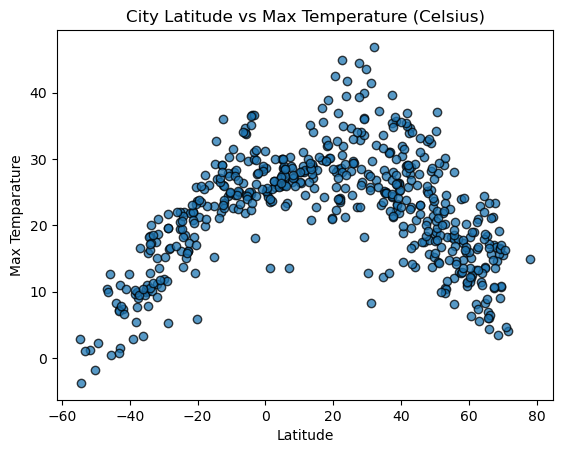

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (Celsius)")
plt.ylabel("Max Temparature")
plt.xlabel("Latitude")
            

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

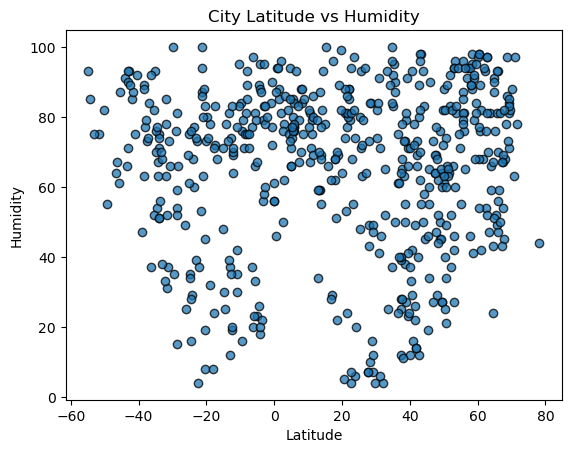

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
            
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

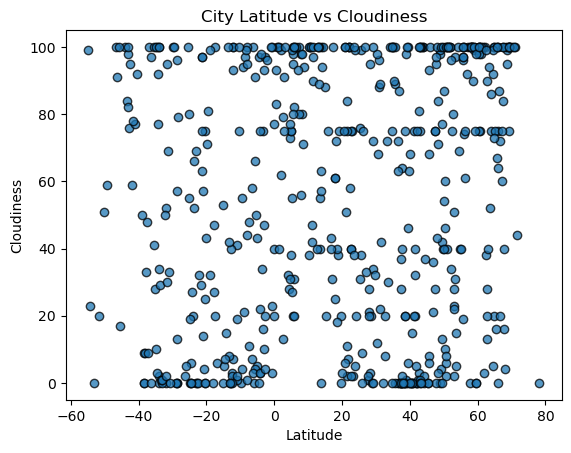

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

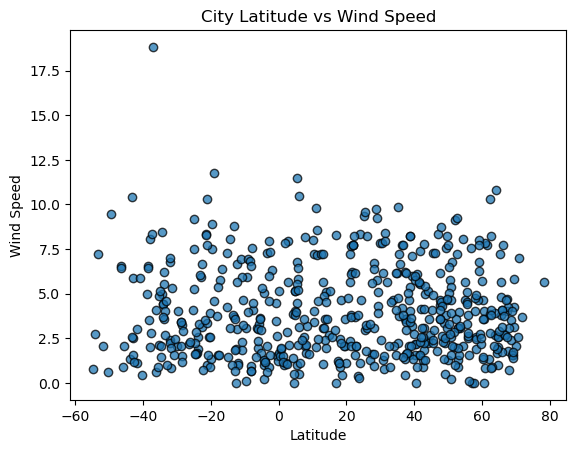

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, title, x_label, y_label):
    sns.regplot(x=x, y=y, line_kws={"color": "red"}, scatter_kws={"color": "blue"})
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    x_pos = min(x) + (max(x) - min(x)) * 0.05
    y_pos = min(y) + (max(y) - min(y)) * 0.95

    plt.annotate(equation, (x_pos, y_pos), ha='left')
    
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,18.27,71,40,4.63,GB,1689433814
2,craig,40.5153,-107.5464,18.79,42,0,0.00,US,1689433814
3,san patricio,28.0170,-97.5169,32.92,49,21,6.71,US,1689433814
4,peniche,39.3558,-9.3811,25.16,71,46,7.13,PT,1689433814
6,xilin hot,43.9667,116.0333,17.03,50,100,2.33,CN,1689433815


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,8.23,91,100,1.34,NZ,1689433814
5,inhambane,-23.8650,35.3833,21.99,68,20,2.57,MZ,1689433814
7,lebu,-37.6167,-73.6500,9.06,73,48,2.78,CL,1689433815
10,urangan,-25.3000,152.9000,19.41,69,100,4.11,AU,1689433816
11,kasungu,-13.0333,33.4833,22.03,37,0,3.70,MW,1689433816


###  Temperature vs. Latitude Linear Regression Plot

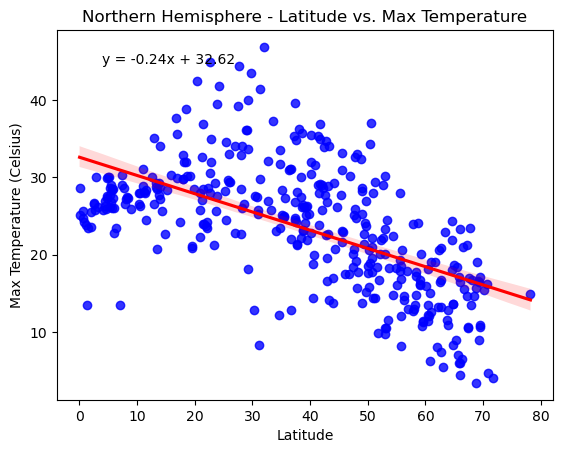

Linear Regression Results:
Slope: -0.23612269000927233
Intercept: 32.61629304076685
R-value: -0.5893706788249566
P-value: 3.4222816711651228e-37
Standard Error: 0.016581517952042806


In [15]:
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])


create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                              "Northern Hemisphere - Latitude vs. Max Temperature",
                              "Latitude", "Max Temperature (Celsius)")


print("Linear Regression Results:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")


plt.show()

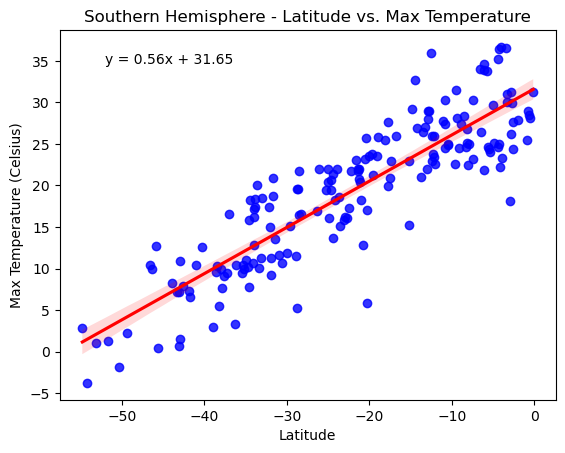

Linear Regression Results:
Slope: 0.5563801408155605
Intercept: 31.647901561998776
R-value: 0.8823344755123833
P-value: 1.7260905059104643e-60
Standard Error: 0.022181191514703043


In [16]:
# Linear regression on Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])


create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                              "Southern Hemisphere - Latitude vs. Max Temperature",
                              "Latitude", "Max Temperature (Celsius)")


print("Linear Regression Results:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

plt.show()

**Discussion about the linear relationship:** Both plots shown above demonstrate an Opposite Relationship, as the regression lines show opposite slopes in both hemispheres. This indicates an inverse relationship between the latitude and temperature in one hemishpere and a positive relationship in the other.

### Humidity vs. Latitude Linear Regression Plot

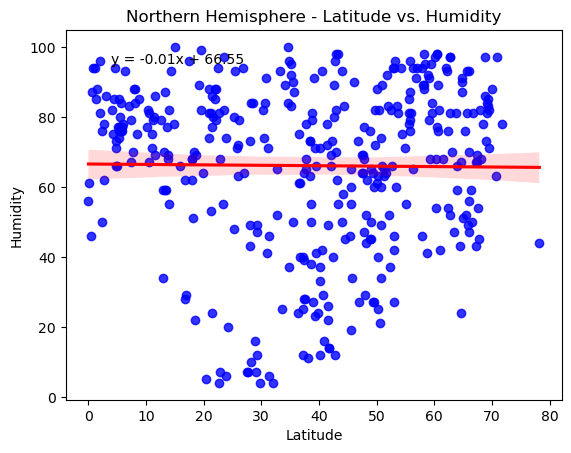

Linear Regression Results:
Slope: -0.012337448484791484
Intercept: 66.548558631787
R-value: -0.010526514744423981
P-value: 0.8373062736764472
Standard Error: 0.060041868423249434


In [17]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])


create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                              "Northern Hemisphere - Latitude vs. Humidity",
                              "Latitude", "Humidity")


print("Linear Regression Results:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")


plt.show()

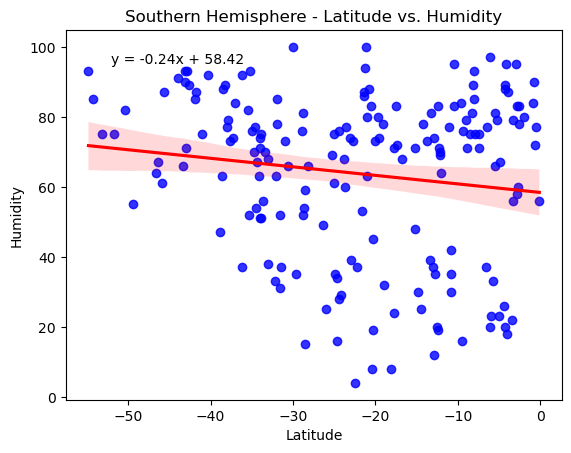

Linear Regression Results:
Slope: -0.24413891644507163
Intercept: 58.41596939480066
R-value: -0.14443088168147142
P-value: 0.052399140680213785
Standard Error: 0.125018063993844


In [18]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])


create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                              "Southern Hemisphere - Latitude vs. Humidity",
                              "Latitude", "Humidity")


print("Linear Regression Results:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

plt.show()

**Discussion about the linear relationship:** Both the Northern and Southern Hemisphere demonstrate that latitude is not a decisive factor in determining humidity level as there is no distinctive patterns or strong coorelation between lattitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

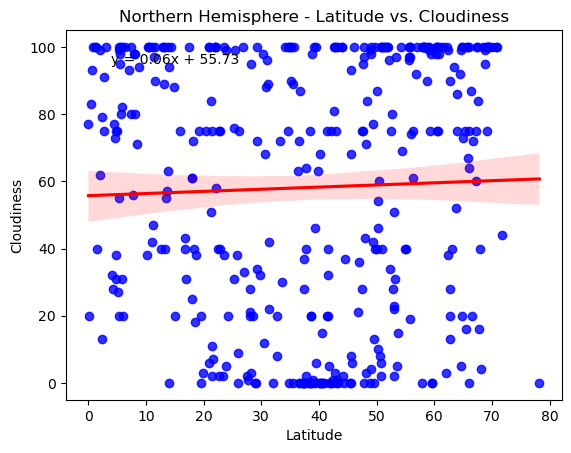

Linear Regression Results:
Slope: 0.06372335632755394
Intercept: 55.73051621100359
R-value: 0.03332227508395582
P-value: 0.5155767350876739
Standard Error: 0.09791748731734917


In [19]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])


create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                              "Northern Hemisphere - Latitude vs. Cloudiness",
                              "Latitude", "Cloudiness")


print("Linear Regression Results:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")


plt.show()

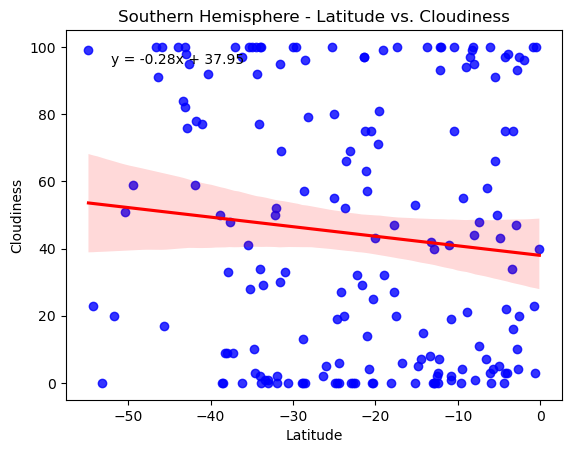

Linear Regression Results:
Slope: -0.2848651347259604
Intercept: 37.95134311055195
R-value: -0.10261546414422587
P-value: 0.16925029099513114
Standard Error: 0.20639601083122847


In [20]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])


create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                              "Southern Hemisphere - Latitude vs. Cloudiness",
                              "Latitude", "Cloudiness")


print("Linear Regression Results:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

plt.show()

**Discussion about the linear relationship:** The regression plot for both Northern and Southern hemispheres Latitude vs. Cloudiness show a scattered distribution with no clear pattern or strong correlation

### Wind Speed vs. Latitude Linear Regression Plot

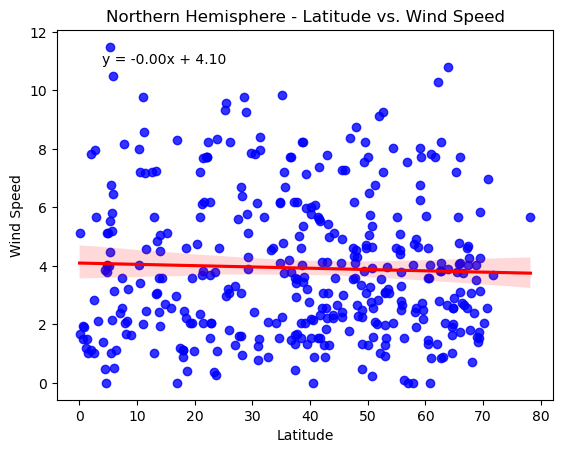

Linear Regression Results:
Slope: -0.004425878091892044
Intercept: 4.099131831514154
R-value: -0.03668104461155081
P-value: 0.4741416026229801
Standard Error: 0.006177359782283903


In [21]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])


create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                              "Northern Hemisphere - Latitude vs. Wind Speed",
                              "Latitude", "Wind Speed")


print("Linear Regression Results:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")


plt.show()

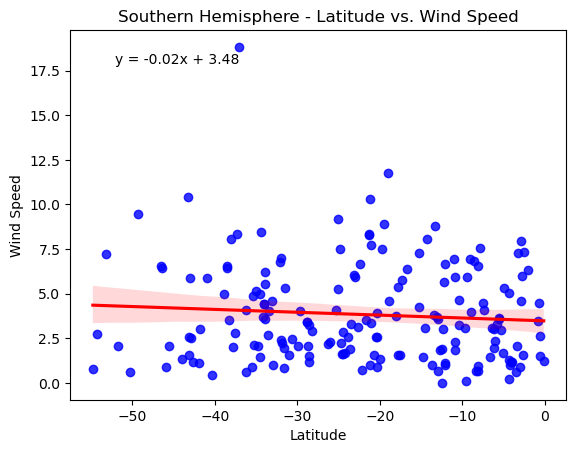

Linear Regression Results:
Slope: -0.01604353761857907
Intercept: 3.4782874196344586
R-value: -0.08130598780234835
P-value: 0.27655787911488067
Standard Error: 0.01469978009264659


In [22]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])


create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                              "Southern Hemisphere - Latitude vs. Wind Speed",
                              "Latitude", "Wind Speed")


print("Linear Regression Results:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

plt.show()

**Discussion about the linear relationship:** In both of the Northern & Southern Hemisphere - Latitude vs. Wind Speed there appears to be a weak correlation bewteen lattidue and wind speed, as there is a slight negative regression line as the lattitude increases 